In [73]:
from connattractor import analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
connfile = '../data_in/connectome_partial_correlation.csv'

mtx = pd.read_csv(connfile)
mtx = mtx.drop("Unnamed: 0", axis='columns')
mtx = mtx.drop("GlobSig", axis="columns")
mtx = mtx.drop(0, axis="index")


simresults = analysis.simulate_activations(mtx.values, noise_coef=1, num_iter=100000, beta=0.05)
# set noise_coef so that the PC-plot is symmetric to the center, but still nicely separates attractors

100%|██████████| 100000/100000 [00:35<00:00, 2830.79it/s]


In [49]:
simresults.save('../data_in/ex_simulation.pckl')

In [50]:
simresults = analysis.load_simulation('../data_in/ex_simulation.pckl')

In [51]:
hopfield_embedding = analysis.create_embeddings(simresults, attractor_sample=1000)
hopfield_embedding.save('../data_in/ex_embedding.pckl')

100%|██████████| 1000/1000 [00:49<00:00, 20.17it/s]


In [52]:
hopfield_embedding = analysis.load_embedding('../data_in/ex_embedding.pckl')

## Empty plot
This is the canvas for plotting stuff.

<PolarAxes: >

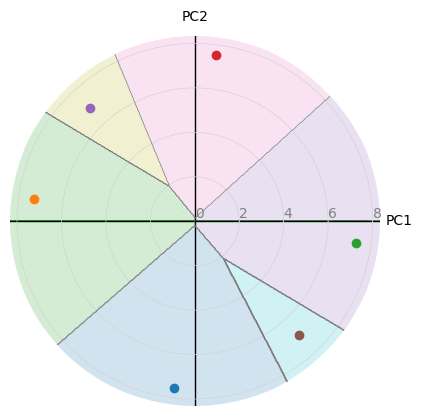

In [53]:
hopfield_embedding.plot()

## Plot activations on the embedding
- we will plot simulated activations
- color them by the attractor state
- we plot the attractors as glassbrains (it's a bit slower)

<PolarAxes: >

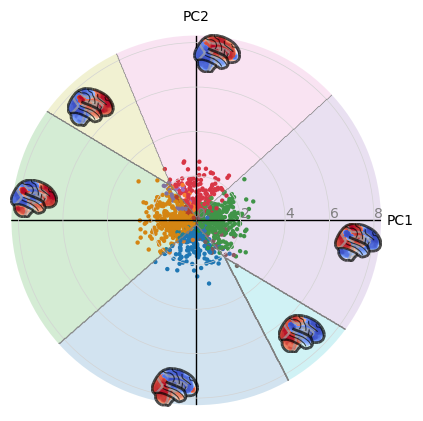

In [54]:
colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
hopfield_embedding.plot(hopfield_embedding.state_sample, 
                        c=colors[hopfield_embedding.attractor_sample.astype(int)],
                        attractor_plot_type='glassbrain')


## Tweak it a bit more, to get a minimalistic style
- set the size and the alpha of the points
- hide the fill of attractor regimes
- set a title
- hide the grid

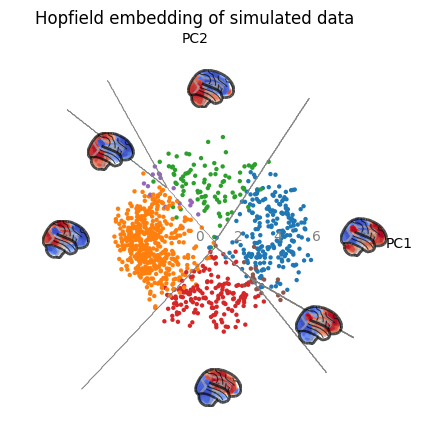

In [9]:
# let's plot the simulated states
import matplotlib.pyplot as plt
colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax=hopfield_embedding.plot(hopfield_embedding.state_sample, s=10,
                        c=colors[hopfield_embedding.attractor_sample.astype(int)], 
                        alpha=1, regimes_fill_kwargs=dict(alpha=0),
                        attractor_plot_type='glassbrain')
ax.set_title("Hopfield embedding of simulated data")
ax.grid(False)

## Another aesthetic
- small black markers
- pastell attractor regimes

<PolarAxes: >

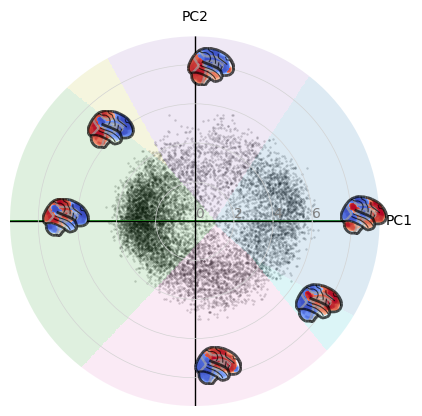

In [10]:
hopfield_embedding.plot(simresults.states, plot_type='scatter', alpha=0.2, s=3, attractor_plot_type='glassbrain',
                        regimes_fill_kwargs=dict(alpha=0.15),
                        regimes_contour_kwargs=dict(alpha=0)
                       )

## Plot activations as densities/contours

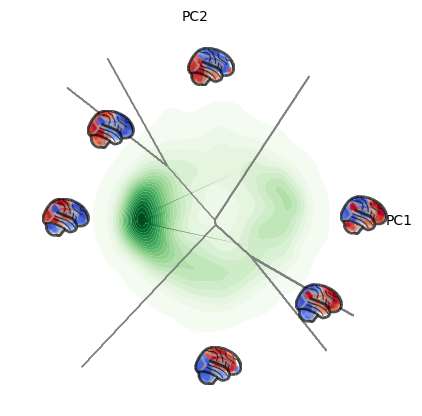

In [11]:
# black and white contour
ax = hopfield_embedding.plot(simresults.states, plot_type='contourf',
                        density_bins=1000, density_sigma=20,
                        attractor_plot_type='glassbrain',
                        regimes_fill_kwargs=dict(alpha=0.0),
                        regimes_contour_kwargs=dict(linewidths=1))
ax.set_yticks([])
ax.grid(False)

## Some printer friendly solutions

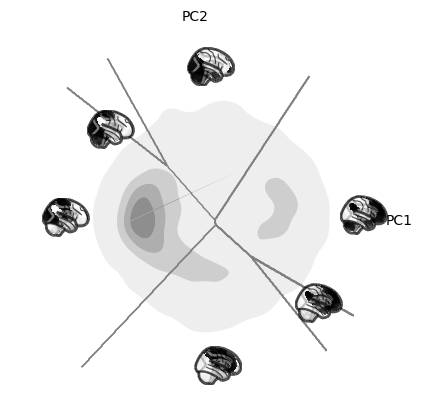

In [12]:
# black and white contourf
ax = hopfield_embedding.plot(simresults.states, plot_type='contourf',
                        density_bins=1000, density_sigma=20, levels=4, alpha=0.5, cmap='gray_r',
                        attractor_plot_type='glassbrain',
                        attractor_kwargs=dict(cmap='binary'),
                        regimes_fill_kwargs=dict(alpha=0.0),
                        regimes_contour_kwargs=dict(linewidths=1, colors='gray') 
                       )
ax.set_yticks([])
ax.xaxis.grid(False)

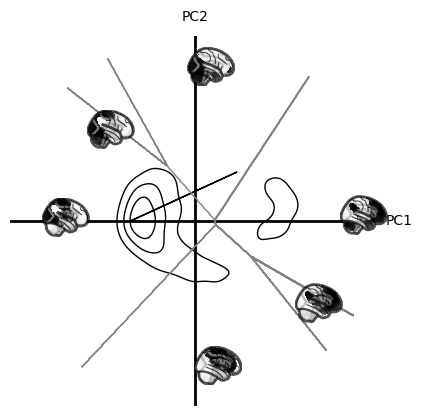

In [13]:
# black and white contour
ax = hopfield_embedding.plot(simresults.states, plot_type='contour',
                        density_bins=1000, density_sigma=20, attractor_plot_type='glassbrain',
                        attractor_kwargs=dict(cmap='binary'),
                        regimes_fill_kwargs=dict(alpha=0.0),
                        regimes_contour_kwargs=dict(linewidths=1, colors='gray', alpha=1, antialiased=True),
                        colors='black', levels=4, linewidths=1, alpha=1   
                       )
ax.set_yticks([])
ax.xaxis.grid(True, linewidth=2)



## Now plot the attractor regimes and the energies of the activations

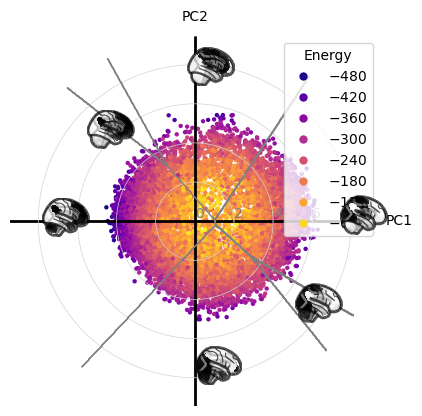

In [14]:
# black and white contour
ax = hopfield_embedding.plot(simresults.states, c=simresults.energies.astype(float), plot_type='scatter', cmap='plasma',
                             attractor_plot_type='glassbrain',
                        attractor_kwargs=dict(cmap='binary_r'),
                        regimes_fill_kwargs=dict(alpha=0),
                        regimes_contour_kwargs=dict(linewidths=1, colors='gray'),
                        legend_kwargs=dict(loc="upper right", title="Energy")
                        )
ax.xaxis.grid(True, linewidth=2)


## Plot real resting state activation maps on the embedding

<PolarAxes: >

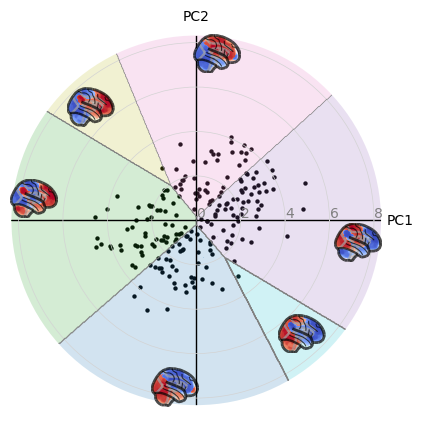

In [55]:
from sklearn.preprocessing import StandardScaler
ex_sub = pd.read_csv('../data_in/ex_timeseries/bochum-004.tsv', sep='\t').iloc[:,1:]

#embedded = hopfield_embedding.embedding_model.transform(ex_sub.values)[:, :2]

hopfield_embedding.plot(ex_sub.values, attractor_plot_type='glassbrain')


<PolarAxes: >

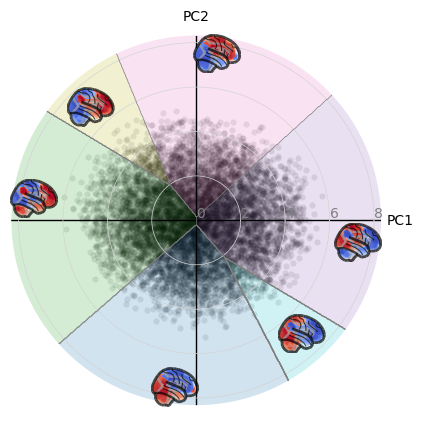

In [56]:
# load more data
from glob import glob
all_ts = []
for f in glob('../data_in/ex_timeseries/bochum-???.tsv'):
    all_ts.append(pd.read_csv(f, sep='\t').iloc[:, 1:].values)
    
all_ts = np.vstack([i for i in all_ts])

hopfield_embedding.plot(all_ts, attractor_plot_type='glassbrain', alpha=0.1, s=20)

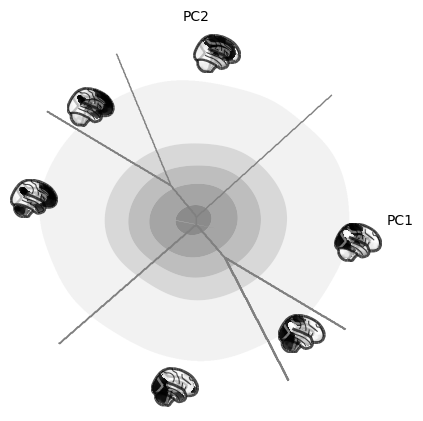

In [57]:
ax = hopfield_embedding.plot(all_ts, plot_type='contourf',
                        density_bins=1000, density_sigma=50, levels=4, alpha=0.5, cmap='gray_r',
                        attractor_plot_type='glassbrain',
                        attractor_kwargs=dict(cmap='binary'),
                        regimes_fill_kwargs=dict(alpha=0.0),
                        regimes_contour_kwargs=dict(linewidths=1, colors='gray') 
                       )
ax.set_yticks([])
ax.xaxis.grid(False)

## Plot an arbitrary activation map on top of it

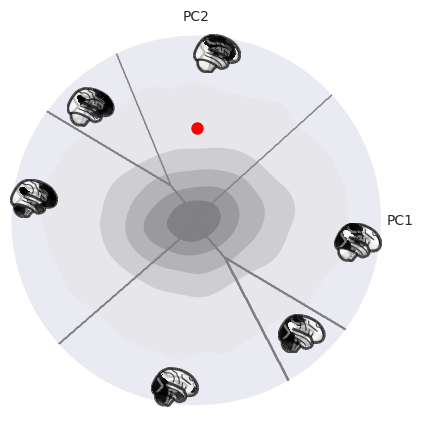

In [75]:
from connattractor import network
state = network.State('../data_in/maps/placebo_metaanalysis_full_pain_g_random.nii.gz')
ax = hopfield_embedding.plot(np.tanh(all_ts), plot_type='contourf',
                        density_bins=1000, density_sigma=30, levels=4, alpha=0.5, cmap='gray_r',
                        attractor_plot_type='scatter',
                        regimes_fill_kwargs=dict(alpha=0.0),
                        regimes_contour_kwargs=dict(linewidths=1) 
                       )
ax.set_yticks([])
ax.xaxis.grid(False)

hopfield_embedding.plot(np.tanh(state.reshape(1, -1)), s=80, c='red', plot_type='scatter', ax=ax,
                        attractor_plot_type='glassbrain',
                        attractor_kwargs=dict(cmap='binary'),
                        regimes_fill_kwargs=dict(alpha=0),
                        regimes_contour_kwargs=dict(alpha=0) 
                       )
ax.set_yticks([])
ax.xaxis.grid(False)

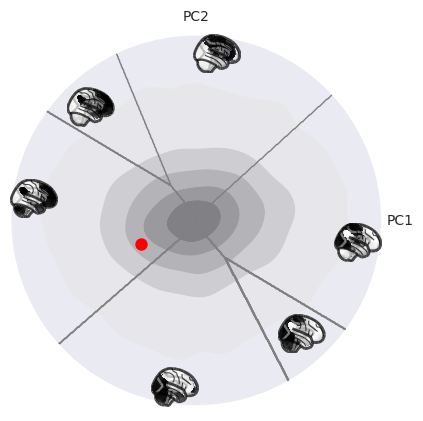

In [76]:
from connattractor import network
state = network.State('/home/tspisak/Downloads/default mode_association-test_z_FDR_0.01.nii.gz')
ax = hopfield_embedding.plot(np.tanh(all_ts), plot_type='contourf',
                        density_bins=1000, density_sigma=30, levels=4, alpha=0.5, cmap='gray_r',
                        attractor_plot_type='scatter',
                        regimes_fill_kwargs=dict(alpha=0.0),
                        regimes_contour_kwargs=dict(linewidths=1) 
                       )
ax.set_yticks([])
ax.xaxis.grid(False)

hopfield_embedding.plot(np.tanh(state.reshape(1, -1)), s=80, c='red', plot_type='scatter', ax=ax,
                        attractor_plot_type='glassbrain',
                        attractor_kwargs=dict(cmap='binary'),
                        regimes_fill_kwargs=dict(alpha=0),
                        regimes_contour_kwargs=dict(alpha=0) 
                       )
ax.set_yticks([])
ax.xaxis.grid(False)